In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# output path 
out_folder = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\hc_video_output\MM_HC_test_distance\09-12-2024\000_raw_pose_data'
figure_name = 'mgold_mpipe_PWS_1_gait_vertical_left.png'
# load data 
mgold_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\hc_video_output\MM_HC_test_distance\09-12-2024\000_raw_pose_data\2024_09_12_02_41_PWS_1_gait_vertical_left_marigold.csv'
yolo_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\hc_video_output\MM_HC_test_distance\09-12-2024\000_raw_pose_data\2024_09_12_02_41_PWS_1_gait_vertical_left_yolo.csv'

mgold_df = pd.read_csv(mgold_path, index_col = 0)
yolo_df = pd.read_csv(yolo_path, index_col = 0)

In [4]:
mgold_df.head()

,frame,label,depth_est
0,0,nose,0.347440
1,0,left_eye_inner,0.351213
2,0,left_eye,0.352838
3,0,left_eye_outer,0.354305
4,0,right_eye_inner,0.355535


In [5]:
mgold_df['label'].value_counts()

label
nose                21
left_pinky          21
left_foot_index     21
right_heel          21
left_heel           21
right_ankle         21
left_ankle          21
right_knee          21
left_knee           21
right_hip           21
left_hip            21
right_thumb         21
left_thumb          21
right_index         21
left_index          21
right_pinky         21
right_wrist         21
left_eye_inner      21
left_wrist          21
right_elbow         21
left_elbow          21
right_shoulder      21
left_shoulder       21
mouth_right         21
mouth_left          21
right_ear           21
left_ear            21
right_eye_outer     21
right_eye           21
right_eye_inner     21
left_eye_outer      21
left_eye            21
right_foot_index    21
Name: count, dtype: int64

In [6]:
# make label categorical 
mgold_df['label'] = mgold_df['label'].astype('category')
mgold_df.dtypes

frame           int64
label        category
depth_est     float64
dtype: object

In [7]:
# drop nan vals and check which frames have data 
mgold_df = mgold_df.dropna(subset = ['label'])
mgold_df['frame'].value_counts()

frame
0      33
330    33
570    33
540    33
510    33
480    33
450    33
420    33
390    33
360    33
300    33
30     33
270    33
240    33
210    33
180    33
150    33
120    33
90     33
60     33
600    33
Name: count, dtype: int64

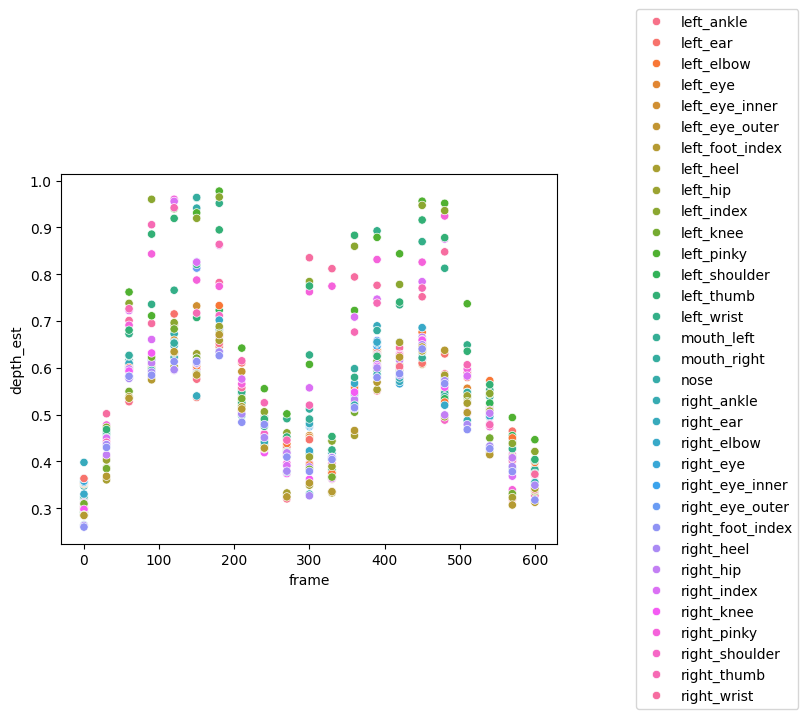

In [8]:
# plot all marigold markers 
sns.scatterplot(x = 'frame', y = 'depth_est', hue = 'label', data = mgold_df)
plt.legend(loc = 'right', bbox_to_anchor = (1.5, 0.5))

In [9]:
yolo_df.head()

,X,Y,label,frame
0,0.0,0.0,nose,0
1,0.0,0.0,left_eye,0
2,0.0,0.0,right_eye,0
3,0.0,0.0,left_ear,0
4,0.0,0.0,right_ear,0


In [10]:
yolo_df['label'].value_counts()

label
nose              613
left_wrist        613
left_ankle        613
right_knee        613
left_knee         613
right_hip         613
left_hip          613
right_wrist       613
right_elbow       613
left_eye          613
left_elbow        613
right_shoulder    613
left_shoulder     613
right_ear         613
left_ear          613
right_eye         613
right_ankle       613
Name: count, dtype: int64

In [11]:
# hip width in pixels 
r_hip_yolo_df = yolo_df.loc[yolo_df['label'] == 'right_hip']
r_hip_yolo_df.set_index('frame', inplace=True)
l_hip_yolo_df = yolo_df.loc[yolo_df['label'] == 'left_hip']
l_hip_yolo_df.set_index('frame', inplace=True)
r_hip_yolo_df.head()

l_hip_yolo_df = l_hip_yolo_df.copy()
l_hip_yolo_df.loc[:, 'hip_width_x'] = abs(r_hip_yolo_df['X'] - l_hip_yolo_df['X']).rolling(window=10, min_periods = 1).mean()

In [12]:
l_hip_yolo_df.head()

,X,Y,label,hip_width_x
frame,,,,
0,410.23657,335.46510,left_hip,73.381290
1,410.23215,331.95947,left_hip,73.110595
2,411.20400,330.26227,left_hip,72.662497
3,410.49915,329.53436,left_hip,72.008315
4,410.76938,329.96735,left_hip,71.474066


<Axes: xlabel='frame', ylabel='hip_width_x'>

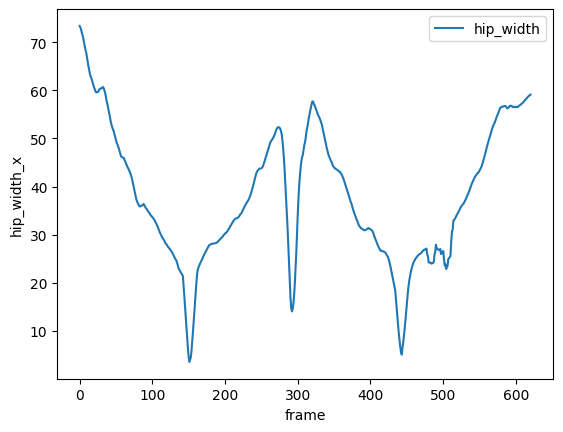

In [13]:
sns.lineplot(x = 'frame', y = 'hip_width_x', data = l_hip_yolo_df, label = 'hip_width')

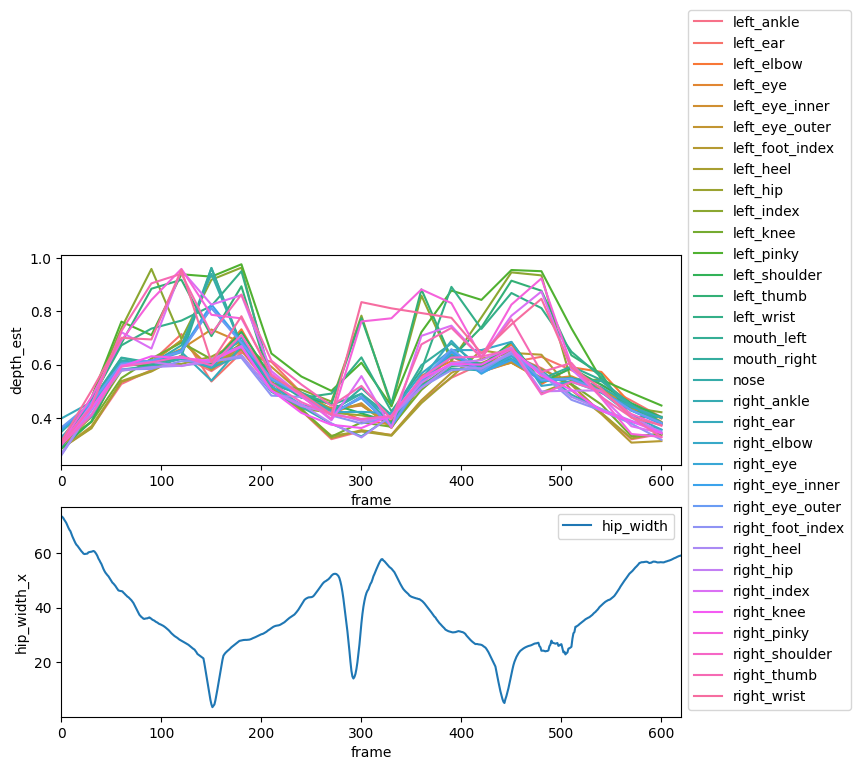

In [14]:
# plot both marigold depth and hip width 
max_frame = yolo_df['frame'].max()

fig, axs = plt.subplots(2, 1, figsize=(8, 6))
sns.lineplot(x = 'frame', y = 'depth_est', hue = 'label', data = mgold_df, ax = axs[0])
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
axs[0].set_xlim(0, max_frame) 

sns.lineplot(x = 'frame', y = 'hip_width_x', data = l_hip_yolo_df, label = 'hip_width', ax = axs[1])
axs[1].legend(loc = 'upper right')
axs[1].set_xlim(0, max_frame) 
plt.show()
fig.savefig(os.path.join(out_folder, figure_name),
                         bbox_inches = 'tight')